In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kendalltau, spearmanr, pearsonr
from itertools import combinations

# Feature importance for predicting diabetes:
## 1) Random forest regression/classification 
### a) .feature_importances_ attribute
### b) permutation test (yields no result on full dataset, clustering features gives unclear result) 
## 2) PCA Loadings
## 3) Elastic Net (with cross-validation) coefficients 
## 4) Fixed effects (continuous OGTT) or Mixed effects (3-class normal/impaired/diabetic) models p-values under glucose tolerance

In [4]:
rfr_feat_imp = pd.read_csv(r'..\data\processed\RandomForestRegressor_feature_importances.csv', index_col=0)
rfr_feat_imp

,0
i,
l_0,0.000078
l_1,0.000109
l_2,0.000543
l_3,0.000224
l_4,0.000072
...,...
m_169,0.000566
m_213,0.000241
m_24,0.000138


## For PCA loadings, the 1st principal component separates Random vs Fasted
## 2nd PC roughly separates their OGTT glucose tolerance 

In [5]:
pca_loadings = pd.read_csv(r'..\data\processed\PCA_loadings.csv', index_col=0)
pca_loadings

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
i,,,,,,,,,,,,,,,,,,,,,
l_0,0.310531,0.086246,0.295792,0.114823,-0.409675,-0.077238,0.284320,-0.372093,-0.138271,-0.123392,...,-0.028091,-0.016773,0.095484,0.018561,-0.172061,-0.040868,0.011424,0.032280,-0.007644,5.259281e-15
l_1,-0.068347,0.126659,0.277326,0.059334,-0.431271,-0.008035,0.181902,-0.344885,-0.274535,-0.085639,...,-0.070965,-0.041339,0.126471,-0.018663,-0.080373,-0.008260,-0.043507,-0.046827,0.083249,-2.289419e-15
l_2,0.265810,-0.284365,0.150411,0.146854,-0.637921,0.195378,-0.066032,-0.230329,-0.112728,-0.164111,...,-0.019800,-0.002817,0.032507,0.031058,-0.006726,0.021502,0.020857,0.025851,0.036717,4.669526e-16
l_3,0.301548,0.063341,0.194355,0.252840,-0.149542,0.078641,0.031024,-0.372421,-0.225886,-0.138251,...,0.075058,-0.002286,0.090253,-0.032193,-0.014315,-0.039038,-0.058916,0.046468,0.070295,2.723001e-15
l_4,0.211633,-0.137616,0.109383,-0.000907,-0.411857,0.092067,-0.032433,-0.407962,-0.198806,-0.205043,...,-0.012552,-0.022498,-0.124920,0.077668,-0.026260,0.018699,-0.033354,0.094149,0.082060,-1.067859e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
m_169,0.219981,0.377147,-0.121822,0.309995,-0.010129,-0.342535,-0.100410,0.224624,0.080051,0.123157,...,-0.021599,-0.054550,-0.023419,-0.096314,0.052166,0.044880,0.042515,-0.001762,0.053702,3.512209e-17
m_213,0.560037,0.044828,-0.611592,0.063132,-0.203307,0.188391,-0.129049,0.029330,0.060609,0.182713,...,0.029508,-0.039030,-0.043413,0.054882,0.018862,0.019112,-0.038360,0.012635,0.059994,-1.781712e-17
m_24,0.558559,-0.008556,-0.683029,0.132528,-0.191291,0.188804,-0.080217,-0.019923,0.011109,0.133419,...,0.010233,-0.009655,-0.037403,0.029416,0.015177,0.027741,-0.002787,0.016537,0.052947,-5.169993e-17


In [17]:
lr_coefs = pd.read_csv(r'..\data\processed\ElasticNetCV_feature_importance.csv', index_col=0)
lr_coefs

,ols,ridge,lasso,encv,i,id
0,0.324790,-0.928348,-0.0,-0.000000,l_0,unknown_679.05463_0.536
1,0.515974,-0.311146,-0.0,-0.000000,l_1,unknown_641.1087_0.537
2,0.442030,-0.218999,-0.0,-0.000000,l_2,unknown_951.15973_0.541
3,0.399679,-3.178691,-0.0,-4.560461,l_3,unknown_329.03067_0.542
4,0.753660,-0.957431,-0.0,-0.000000,l_4,unknown_969.13147_0.544
...,...,...,...,...,...,...
1722,-0.307600,-4.389301,-0.0,-6.089514,m_169,unknown_174.00102_9.94
1723,-0.087114,-1.187415,0.0,-0.000000,m_213,unknown_187.04097_9.971
1724,-0.263106,-2.081337,0.0,-0.000000,m_24,DL-Lactic Acid_89.02331_9.99
1725,-0.194991,-1.413319,0.0,-0.000000,m_505,unknown_313.051_9.991


In [19]:
en_coefs = lr_coefs.set_index('i')['encv']
en_coefs

i
l_0     -0.000000
l_1     -0.000000
l_2     -0.000000
l_3     -4.560461
l_4     -0.000000
           ...   
m_169   -6.089514
m_213   -0.000000
m_24    -0.000000
m_505   -0.000000
m_441   -3.249519
Name: encv, Length: 1727, dtype: float64

[1727,
 1726,
 1725,
 1724,
 1723,
 1722,
 1721,
 1720,
 1719,
 1718,
 1717,
 1716,
 1715,
 1714,
 1713,
 1712,
 1711,
 1710,
 1709,
 1708,
 1707,
 1706,
 1705,
 1704,
 1703,
 1702,
 1701,
 1700,
 1699,
 1698,
 1697,
 1696,
 1695,
 1694,
 1693,
 1692,
 1691,
 1690,
 1689,
 1688,
 1687,
 1686,
 1685,
 1684,
 1683,
 1682,
 1681,
 1680,
 1679,
 1678,
 1677,
 1676,
 1675,
 1674,
 1673,
 1672,
 1671,
 1670,
 1669,
 1668,
 1667,
 1666,
 1665,
 1664,
 1663,
 1662,
 1661,
 1660,
 1659,
 1658,
 1657,
 1656,
 1655,
 1654,
 1653,
 1652,
 1651,
 1650,
 1649,
 1648,
 1647,
 1646,
 1645,
 1644,
 1643,
 1642,
 1641,
 1640,
 1639,
 1638,
 1637,
 1636,
 1635,
 1634,
 1633,
 1632,
 1631,
 1630,
 1629,
 1628,
 1627,
 1626,
 1625,
 1624,
 1623,
 1622,
 1621,
 1620,
 1619,
 1618,
 1617,
 1616,
 1615,
 1614,
 1613,
 1612,
 1611,
 1610,
 1609,
 1608,
 1607,
 1606,
 1605,
 1604,
 1603,
 1602,
 1601,
 1600,
 1599,
 1598,
 1597,
 1596,
 1595,
 1594,
 1593,
 1592,
 1591,
 1590,
 1589,
 1588,
 1587,
 1586,
 1585,

In [41]:
# fe = Fixed Effects
fe = pd.read_csv(r'..\data\processed\OGTT_fixed_effects_lm_results.csv', index_col=0)
fe_gluc = fe[['fdr_gluc_qval']].sort_values('fdr_gluc_qval')
display(fe_gluc.head(5))
# Sort values then rank them based on p-value for easier rank correlation in Spearman or Kendall
fe_gluc['rank'] = range(len(fe_gluc), 0, -1)
fe_gluc = fe_gluc[['rank']]
fe_gluc

,fdr_gluc_qval
feature_name,
l_669,8.965495e-16
l_822,4.423250e-15
l_823,1.472677e-14
l_670,8.395945e-14
l_706,1.217402e-12


,rank
feature_name,
l_669,1727
l_822,1726
l_823,1725
l_670,1724
l_706,1723
...,...
m_215,5
m_523,4
m_196,3


In [56]:
large_loadings = pca_loadings.loc[(pca_loadings['1'] > 0.4) | (pca_loadings['1'] < -0.6), '1']
large_loadings_index = large_loadings.index

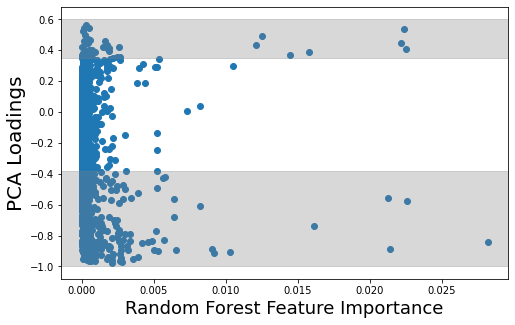

In [67]:
# plt.hlines(0.35, 0, 0.031, color='orange')
# plt.hlines(-0.38, 0, 0.031, color='orange')
plt.scatter(rfr_feat_imp, pca_loadings['1'])
plt.ylabel('PCA Loadings', fontsize=20)
plt.xlabel('Random Forest Feature Importance', fontsize=18)
plt.gcf().set_size_inches(8, 5)
plt.axhspan(0.35, 0.6, color='gray', alpha=0.3)
plt.axhspan(-0.38, -1, color='gray', alpha=0.3)

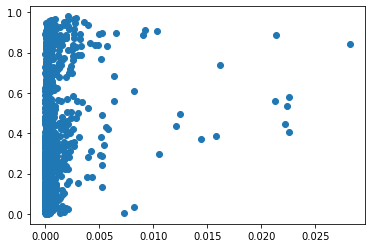

In [58]:
plt.scatter(rfr_feat_imp, abs(pca_loadings['1']))

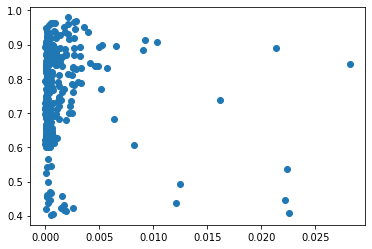

In [57]:
plt.scatter(rfr_feat_imp.loc[large_loadings_index], abs(pca_loadings['1'].loc[large_loadings_index]))

In [30]:
spearmanr(rfr_feat_imp, abs(en_coefs))

SpearmanrResult(correlation=0.30098443856244844, pvalue=1.7062419729527625e-37)

# Make dataframe with rank-ordered features for all methods

In [84]:
rng = range(len(fe_gluc), 0, -1)

rf = rfr_feat_imp.sort_values('0', ascending=False)
rf['rf'] = rng
rf = rf[['rf']]
rf

en = en_coefs
en = pd.DataFrame(en.sort_values(ascending=False, key=abs))
en['en'] = rng
en = en[['en']]
en

fe_gluc = fe[['fdr_gluc_qval']].sort_values('fdr_gluc_qval')
fe_gluc['fe'] = range(len(fe_gluc), 0, -1)
fem = fe_gluc[['fe']]
fem

pca = pca_loadings[['1']].sort_values('1', ascending=False, key=abs)
pca['pc'] = rng
pca = pca[['pc']]

In [85]:
ranks = pd.concat([rf, en, fem, pca], axis=1)
ranks

,rf,en,fe,pc
l_720,1727,1343,1709,1634
m_693,1726,1704,1681,1426
m_37,1725,1725,1716,1231
m_243,1724,1682,1656,1383
m_139,1723,1716,1675,1278
...,...,...,...,...
m_214,5,997,168,234
m_90,4,1151,1116,700
m_660,3,1231,1227,417
l_404,2,569,1014,1096


In [105]:
rank_result = {}
for combo in combinations(['rf', 'en', 'fe', 'pc'], 2):
#     print(combo)
    corr = spearmanr(ranks[combo[0]], ranks[combo[1]])
    rank_result[combo] = [round(corr[0], 4), corr[1]]
rank_result

{('rf', 'en'): [0.1604, 2.049783230388496e-11],
 ('rf', 'fe'): [0.3509, 3.274228329088038e-51],
 ('rf', 'pc'): [0.2793, 2.56657817738596e-32],
 ('en', 'fe'): [-0.0131, 0.586886253168802],
 ('en', 'pc'): [-0.1255, 1.6714647106875408e-07],
 ('fe', 'pc'): [0.6224, 9.413412048668537e-186]}

In [106]:
rank_result = {}
for combo in combinations(['rf', 'en', 'fe', 'pc'], 2):
#     print(combo)
    corr = kendalltau(ranks[combo[0]], ranks[combo[1]])
    rank_result[combo] = [corr[0], corr[1]]
rank_result

{('rf', 'en'): [0.10309238922947582, 1.364184332342777e-10],
 ('rf', 'fe'): [0.2379326100827898, 1.142602522361764e-49],
 ('rf', 'pc'): [0.18723216100901702, 2.0536943760311007e-31],
 ('en', 'fe'): [-0.011262069738278488, 0.48310381007441106],
 ('en', 'pc'): [-0.07778644807672565, 1.2726989593478921e-06],
 ('fe', 'pc'): [0.43667241232393156, 7.910347767252612e-163]}

# Create a metric of overlap of features that will iterate through the list of top-ranked features 

In [104]:
for rank_index in range(200):
    for method in [rf, en, fem, pca]

TypeError: combinations() missing required argument 'iterable' (pos 1)